### 프로젝트 보험료 (charges) 예측하기

### 데이터 로드

In [3]:
import pandas as pd
import numpy as np
df_train = pd.read_csv("insurrance_train.csv")
df_test = pd.read_csv("insurrance_test_label.csv")

### 전처리

#### 데이터 타입 정보를 살펴봅니다.

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1098 non-null   int64  
 1   sex       1095 non-null   object 
 2   bmi       1091 non-null   float64
 3   children  1094 non-null   float64
 4   smoker    1098 non-null   object 
 5   region    1098 non-null   object 
 6   charges   1098 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 60.2+ KB


#### 기술적인 통계를 통해 데이터를 살펴봅니다.

In [4]:
df_train.describe()

,age,bmi,children,charges
count,1098.000000,1091.000000,1094.000000,1098.000000
mean,39.594718,30.761334,1.075868,13242.849576
std,14.174413,6.080328,1.192652,12044.570520
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.410000,0.000000,4724.369462
50%,40.000000,30.495000,1.000000,9412.962500
75%,52.000000,34.800000,2.000000,16454.504562
max,64.000000,52.580000,5.000000,63770.428010


In [5]:
df_train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520


In [6]:
df_train['sex'].value_counts()

male      561
female    534
Name: sex, dtype: int64

In [7]:
df_train['children'].value_counts()

0.0    475
1.0    266
2.0    194
3.0    126
4.0     20
5.0     13
Name: children, dtype: int64

In [8]:
df_train['smoker'].value_counts()

no     877
yes    221
Name: smoker, dtype: int64

In [9]:
df_train['region'].value_counts()

southeast    302
northeast    270
southwest    266
northwest    260
Name: region, dtype: int64

<AxesSubplot:xlabel='children', ylabel='charges'>

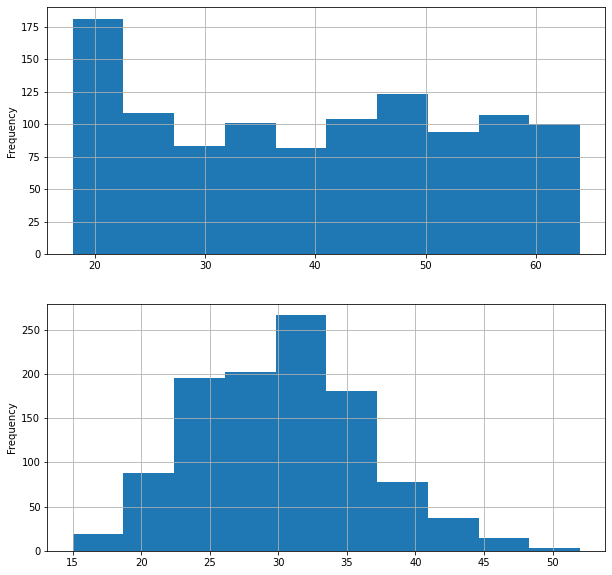

<Figure size 1080x1080 with 0 Axes>

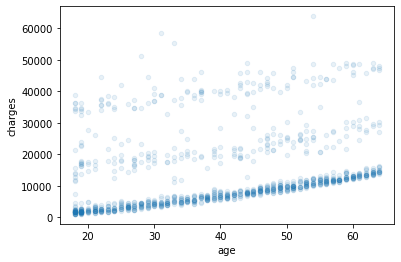

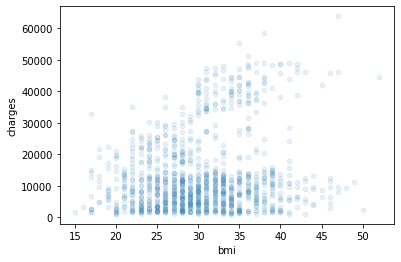

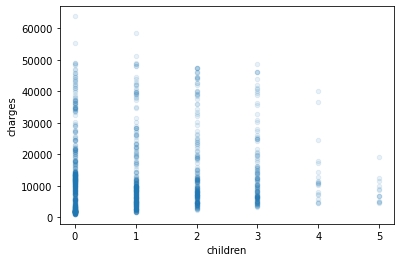

In [58]:
fig = plt.figure(figsize=(10,10))

fig.add_subplot(2, 1, 1)
df_train['age'].plot(kind = 'hist', bins = 10, grid = True)

fig.add_subplot(2, 1, 2)
df_train['bmi'].plot(kind = 'hist', bins = 10, grid = True)

fig = plt.figure(figsize=(15,15))

df_train.plot('age', 'charges', kind = 'scatter', alpha = 0.1)

df_train.plot('bmi', 'charges', kind = 'scatter', alpha = 0.1)

df_train.plot('children', 'charges', kind = 'scatter', alpha = 0.1)

#### 범주형 데이터를 라벨 값으로 변환합니다.

In [4]:
df_train['sex'].replace(['male', 'female'], range(2), inplace=True)

In [5]:
df_train['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [6]:
df_train['region'].replace(['southwest', 'southeast', 'northwest', 'northeast'], range(4), inplace=True)

In [7]:
df_train['smoker'].replace(['no', 'yes'], range(2), inplace=True)

#### Test set도 동일하게 진행

In [8]:
df_test['sex'].replace(['male', 'female'], range(2), inplace=True)

In [9]:
df_test['region'].unique()

array(['northeast', 'southeast', 'southwest', 'northwest'], dtype=object)

In [10]:
df_test['region'].replace(['southwest', 'southeast', 'northwest', 'northeast'], range(4), inplace=True)

In [11]:
df_test['smoker'].replace(['no', 'yes'], range(2), inplace=True)

#### Age Grouping

In [12]:
df_train.loc[df_train['age'] <= 15, 'Age_group'] = 0
df_train.loc[(df_train['age'] > 15) & (df_train['age'] <= 30), 'Age_group'] = 1
df_train.loc[(df_train['age'] > 30) & (df_train['age'] <= 45), 'Age_group'] = 2
df_train.loc[(df_train['age'] > 45) & (df_train['age'] <= 60), 'Age_group'] = 3
df_train.loc[df_train['age'] > 60, 'Age_group'] = 4

In [13]:
df_train

,age,sex,bmi,children,smoker,region,charges,Age_group
0,19,1.0,27.900,0.0,1,0,16884.92400,1.0
1,18,0.0,33.770,1.0,0,1,1725.55230,1.0
2,28,0.0,33.000,3.0,0,1,4449.46200,1.0
3,33,0.0,22.705,0.0,0,2,21984.47061,2.0
4,32,0.0,28.880,0.0,0,2,3866.85520,2.0
...,...,...,...,...,...,...,...,...
1093,22,1.0,30.400,0.0,1,2,33907.54800,1.0
1094,50,1.0,33.700,4.0,0,0,11299.34300,3.0
1095,18,1.0,31.350,4.0,0,3,4561.18850,1.0
1096,51,1.0,34.960,2.0,1,3,44641.19740,3.0


In [14]:
df_test.loc[df_test['age'] <= 15, 'Age_group'] = 0
df_test.loc[(df_test['age'] > 15) & (df_test['age'] <= 30), 'Age_group'] = 1
df_test.loc[(df_test['age'] > 30) & (df_test['age'] <= 45), 'Age_group'] = 2
df_test.loc[(df_test['age'] > 45) & (df_test['age'] <= 60), 'Age_group'] = 3
df_test.loc[df_test['age'] > 60, 'Age_group'] = 4

In [15]:
df_test

,age,sex,bmi,children,smoker,region,charges,Age_group
0,52,1.0,30.875,0,0,3,23045.56616,3.0
1,25,1.0,33.990,1,0,1,3227.12110,1.0
2,33,1.0,19.095,2,1,3,16776.30405,2.0
3,53,0.0,28.600,3,0,0,11253.42100,3.0
4,29,0.0,40.100,1,0,1,3471.40960,1.0
...,...,...,...,...,...,...,...,...
235,50,0.0,30.970,3,0,2,10600.54830,3.0
236,18,1.0,31.920,0,0,3,2205.98080,1.0
237,18,1.0,36.850,0,0,1,1629.83350,1.0
238,21,1.0,25.800,0,0,0,2007.94500,1.0


#### 결측치를 제거해줍니다.

In [16]:
# 결측치 제거
df_train = df_train.dropna()

# 결측치 파악
print(df_train.isnull().sum())

age          0
sex          0
bmi          0
children     0
smoker       0
region       0
charges      0
Age_group    0
dtype: int64


In [17]:
# 결측치 제거
df_test = df_test[df_test.notnull()]

# 결측치 파악
print(df_test.isnull().sum())

age          0
sex          1
bmi          0
children     0
smoker       0
region       0
charges      0
Age_group    0
dtype: int64


#### 위의 기능이 제대로 작동하지 않아 다시 구현

In [18]:
# 결측치 제거
df_test = df_test.dropna()

# 결측치 파악
print(df_test.isnull().sum())

age          0
sex          0
bmi          0
children     0
smoker       0
region       0
charges      0
Age_group    0
dtype: int64


In [19]:
df_train = df_train.astype(int)
df_train.head(3)

,age,sex,bmi,children,smoker,region,charges,Age_group
0,19,1,27,0,1,0,16884,1
1,18,0,33,1,0,1,1725,1
2,28,0,33,3,0,1,4449,1


In [20]:
df_test = df_test.astype(int)
df_test.head(3)

,age,sex,bmi,children,smoker,region,charges,Age_group
0,52,1,30,0,0,3,23045,3
1,25,1,33,1,0,1,3227,1
2,33,1,19,2,1,3,16776,2


### 데이터 시각화

In [21]:
df_train

,age,sex,bmi,children,smoker,region,charges,Age_group
0,19,1,27,0,1,0,16884,1
1,18,0,33,1,0,1,1725,1
2,28,0,33,3,0,1,4449,1
3,33,0,22,0,0,2,21984,2
4,32,0,28,0,0,2,3866,2
...,...,...,...,...,...,...,...,...
1093,22,1,30,0,1,2,33907,1
1094,50,1,33,4,0,0,11299,3
1095,18,1,31,4,0,3,4561,1
1096,51,1,34,2,1,3,44641,3


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'age')

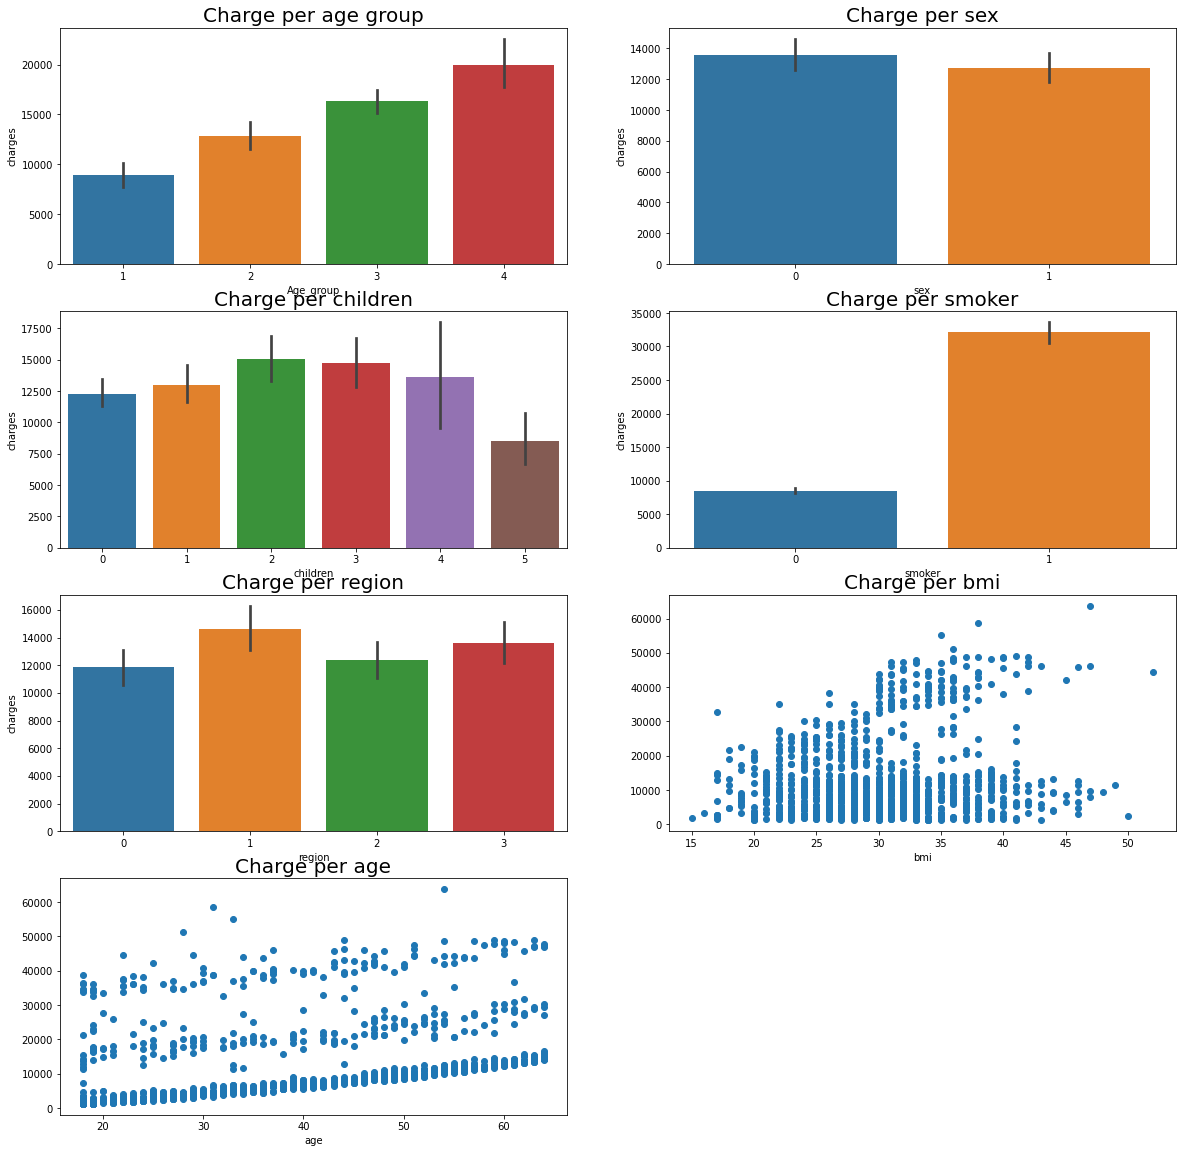

In [81]:
fig = plt.figure(figsize=[20,20])
fig.add_subplot(4,2,1)
sns.barplot(x='Age_group', y='charges', data=df_train)
plt.title('Charge per age group', fontsize=20)

fig.add_subplot(4,2,2)
sns.barplot(x='sex', y='charges', data=df_train)
plt.title('Charge per sex', fontsize=20)

fig.add_subplot(4,2,3)
sns.barplot(x='children', y='charges', data=df_train)
plt.title('Charge per children', fontsize=20)

fig.add_subplot(4,2,4)
sns.barplot(x='smoker', y='charges', data=df_train)
plt.title('Charge per smoker', fontsize=20)

fig.add_subplot(4,2,5)
sns.barplot(x='region', y='charges', data=df_train)
plt.title('Charge per region', fontsize=20)

fig.add_subplot(4,2,6)
plt.scatter(df_train['bmi'],df_train['charges'])
plt.title('Charge per bmi', fontsize=20)
plt.xlabel('bmi')

fig.add_subplot(4,2,7)
plt.scatter(df_train['age'],df_train['charges'])
plt.title('Charge per age', fontsize=20)
plt.xlabel('age')

### 모델 학습

#### KNN , RandomForest, XGB , Light GBM 별로 모델합습하기

In [22]:
# 훈련 및 테스트 데이터 나누기
X_train = df_train[df_train.columns.difference(['charges'])]
X_test = df_test[df_test.columns.difference(['charges'])]

y_train = df_train['charges'].astype(int)
y_test = df_test['charges'].astype(int)

#### 모델 불러오기

In [32]:
# lightgbm 설치하기
# pip install lightgbm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

#### 파라미터 지정하기

In [24]:
knn_reg = KNeighborsRegressor()
rf_reg = RandomForestClassifier()
gb_reg = LGBMRegressor()
xgb_reg = XGBRegressor() 

estimators = [('knn', knn_reg), ('rf_reg', rf_reg), ('xgb_reg', xgb_reg), ('gb_reg', gb_reg)]

#### 성능 지표(MSE) 출력하는 함수 만들기

In [25]:
from sklearn.metrics import mean_squared_error
def print_metrics(y, pred_y, title) : 
    mse = mean_squared_error(y, pred_y)
    print(f"{title} - MSE : {np.round(mse,3)}")

#### 학습 및 예측 후 성능 출력하기

In [26]:
for title, model in estimators : 
    # 학습
    model.fit(X_train, y_train)
    # 예측
    pred = model.predict(X_test)
    #평가
    print_metrics(y_test, pred, title)

knn - MSE : 133216237.654
rf_reg - MSE : 69484612.678
xgb_reg - MSE : 30776847.871
gb_reg - MSE : 23761451.776


In [35]:
y_test1 = y_test.values

In [28]:
pred_data = knn_reg.predict(X_test)
pred_data2 = rf_reg.predict(X_test)
pred_data3 = xgb_reg.predict(X_test)
pred_data4 = gb_reg.predict(X_test)

In [30]:
pred_data = pred_data.reshape(-1, 1)
pred_data2 = pred_data2.reshape(-1, 1)
pred_data3 = pred_data3.reshape(-1, 1)
pred_data4 = pred_data4.reshape(-1, 1)

(0.0, 70000.0)

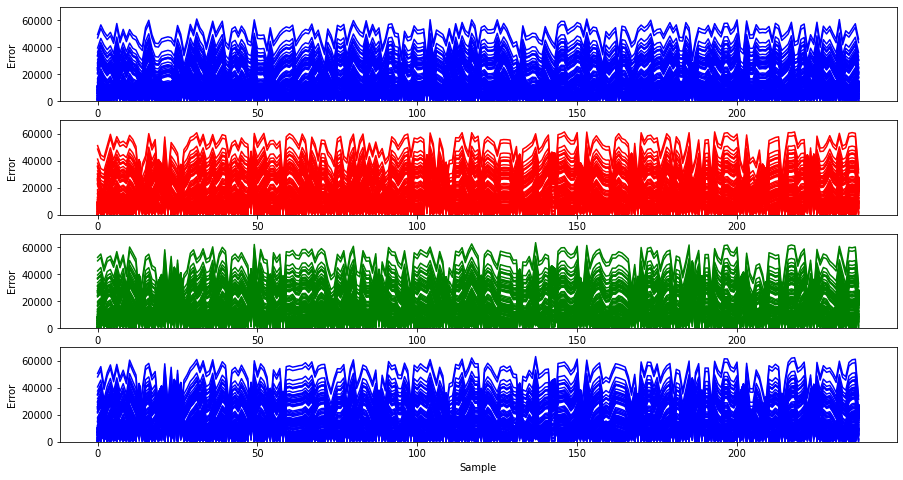

In [51]:
fig = plt.figure(figsize=(15,8))

fig.add_subplot(4,1,1)
plt.plot(np.sqrt(np.power(pred_data-y_test1, 2)), color='b')
plt.xlabel('Sample')
plt.ylabel('Error')
plt.ylim([0,70000])

fig.add_subplot(4,1,2)
plt.plot(np.sqrt(np.power(pred_data2-y_test1, 2)), color='r')
plt.xlabel('Sample')
plt.ylabel('Error')
plt.ylim([0,70000])

fig.add_subplot(4,1,3)
plt.plot(np.sqrt(np.power(pred_data3-y_test1, 2)), color='g')
plt.xlabel('Sample')
plt.ylabel('Error')
plt.ylim([0,70000])

fig.add_subplot(4,1,4)
plt.plot(np.sqrt(np.power(pred_data4-y_test1, 2)), color='b')
plt.xlabel('Sample')
plt.ylabel('Error')
plt.ylim([0,70000])